<h1 align="center">Estados puros y mezclados de un haz de partículas cuánticas con espín 1/2 en presencia de un campo magnético en la configuración de Stern-Gerlach</h1>
<div align="right">David A. Miranda, PhD<br>2022</div>

## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Planteamiento del problema

Sea un haz de partículas cuánticas con espín 1/2 que pasa a través de un campo magnético en la configuración de Stern-Gerlach, donde el gradiente de campo magnético está orientado en la dirección $z$, respecto al sistema de referencia del laboratorio y el haz se propaga en la dirección $x$. Cuando un haz de partículas con espín 1/2 atraviesa el campo magnético de la configuración de Stern-Gerlach, el haz se divide en dos partes, correspondientes con los dos autovalores de la componente $S_z$ del operador espín, es decir, $\pm 1/2$. Si la componente para el número cuántico $-1/2$ es bloqueada (*modo filtro*), entonces, se puede usar dicho montaje como un filtro que permite estudiar el estado de un haz de partículas con espín 1/2, como se describe a continuación.

El modo filtro (configuración Stern-Gerlach con un haz bloqueado) funciona de la siguiente manera: si un haz con espín $1/2$ pasa por el filtro con el eje del gradiente del campo magnético orientado en dirección $z$, entonces, la intensidad del haz a la salida del filtro será igual al de entrada. Si se rota el eje del gradiente del campo magnético de tal manera que la nueva dirección $z’$ no coincide con $z$, la intensidad del haz a la salida será menor que a la entrada.

**Estados de espín puro**: en este caso se puede encontrar una orientación $z’$ para el gradiente del campo magnético en la configuración Stern-Gerlach en modo filtro (con un haz bloqueado) tal que la intensidad del haz incidente será igual a la de salida. En este caso todas las partículas del haz se pueden representar por un mismo vector de estado $|\chi\rangle$.

**Estados de espín mezclados**: en este caso es imposible encontrar una orientación $z’$ para el gradiente del campo magnético en la configuración Stern-Gerlach en modo filtro (con un haz bloqueado) tal que la intensidad del haz incidente será igual a la de salida. En este caso todas las partículas del haz tendrán su propio estado y es imposible representarlas por un único vector de estado $|\chi\rangle$. Los estados de espín mezclados corresponden a ensambles de estados puros y se pueden describir por un operador de densidad $\hat{\rho} = \sum_n W_n |\chi_n\rangle \langle\chi_n|$, donde $W_n$ es la fracción del ensamble en el estado puro $|\chi_n\rangle$.

**Estados de espín 1/2 y [matrices de Pauli](https://en.wikipedia.org/wiki/Pauli_matrices)**: los operadores de espín para partículas 1/2 se describen, en su representación matricial, por medio de las matrices de Pauli $\sigma_x$, $\sigma_y$ y $\sigma_z$, donde el operador espín $\vec{\hat{S}}=\frac{\hbar}{2}\vec{\sigma}$; $\vec{\sigma}$ es el vector de Pauli, cuyas componentes corresponden con las matrices de Pauli. Un cierto estado $|\chi\rangle$ se puede expresar como una combinación lineal de los estados $|\frac{1}{2}\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ y $|-\frac{1}{2}\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, es decir, $|\chi\rangle = a_1 |\frac{1}{2}\rangle + a_2 |-\frac{1}{2}\rangle = \begin{pmatrix} a_1\\ a_2 \end{pmatrix}$, donde $|a_1|^2 + |a_2|^2 = 1$.

$$\sigma_x=\begin{pmatrix}
0 & 1 \\
1 & 0 
\end{pmatrix}, \, \sigma_y=\begin{pmatrix}
0 & -i \\
i & 0 
\end{pmatrix}, \,\sigma_z=\begin{pmatrix}
1 &  0 \\
0 & -1 
\end{pmatrix}$$

**Vector de polarización**: se define como el valor esperado del vector de Pauli, es decir, $\vec{P} = \langle \vec{\sigma} \rangle$, es decir, $P_n = \langle \sigma_n \rangle = \langle \chi | \sigma_n | \chi \rangle$, donde $n$ puede tomar los valores $x, y, z$ y $|\chi\rangle$ es el vector de estado.

### 2.1. Estados de espín puro

**a)** Describa cómo obtener un estado de espín puro y de ejemplos.

**b)** Para un haz conformado por un estado puro, ¿cuál es el efecto de rotar el imán alrededor del eje $x$? Muestre un ejemplo.

**c)** Escriba la expresión general para $|\chi\rangle$ en el caso de tener estados de espín puro.

**d)** Escriba la expresión general para el vector de polarización de estados de espín puro.

### 2.2. Estados de espín mezclados

**a)** Describa cómo obtener un estado mezclado y de ejemplos.

**b)** Al rotar el imán alrededor del eje $x$ para un haz conformado por estados mezclados, ¿se observa lo mismo que en un estado puro? Explique y de un ejemplo.

**d)** Escriba la expresión general para el vector de polarización de estados de espín mezclados.



## 3. Definiciones y Métodos

In [2]:
def plot_figs(θ, a1, a2, fig_num, dpi = 200):
    plt.figure(dpi=dpi)
    plt.subplot(1,2,1)
    plt.plot(np.abs(a1), np.abs(a2))
    plt.gca().set_aspect('equal', 'box')
    plt.xlabel(r'$|a_1|$')
    plt.ylabel(r'$|a_2|$')
    plt.xlim(0,1)
    plt.ylim(0,1)
    _ = plt.title('Figure %da' % fig_num)
    plt.subplot(1,2,2)
    plt.plot(np.abs(a1)**2, np.abs(a2)**2)
    plt.gca().set_aspect('equal', 'box')
    plt.xlabel(r'$|a_1|^2$')
    plt.ylabel(r'$|a_2|^2$')
    plt.xlim(0,1)
    plt.ylim(0,1)
    _ = plt.title('Figure %db' % fig_num)
    plt.gcf().tight_layout()

    θmax = max(180*θ/np.pi)
    plt.figure(dpi=dpi)
    plt.subplot(2,1,1)
    plt.plot(180*θ/np.pi, np.abs(a1), label=r'$|a_1|$')
    plt.plot(180*θ/np.pi, np.abs(a2), label=r'$|a_2|$')
    plt.hlines(1, 0, θmax, linestyles='dotted', color='k')
    plt.xlabel(r'$\theta$  /  $^o$' )
    plt.legend()
    plt.xlim(0, θmax)
    _ = plt.title('Figure %da' % (fig_num+1))
    plt.subplot(2,1,2)
    plt.plot(180*θ/np.pi, np.abs(a1)**2, label=r'$|a_1|^2$')
    plt.plot(180*θ/np.pi, np.abs(a2)**2, label=r'$|a_2|^2$')
    plt.hlines(1, 0, θmax, linestyles='dotted', color='k')
    plt.xlabel(r'$\theta$  /  $^o$' )
    plt.legend()
    plt.xlim(0, θmax)
    _ = plt.title('Figure %db' % (fig_num+1))
    plt.gcf().tight_layout()

In [3]:
def plot_rho(θ, ρ_11, ρ_22, fig_num, dpi=200):
    plt.figure(dpi=dpi)
    θmax = max(180*θ/np.pi)
    plt.plot(180*θ/np.pi, ρ_11, label=r'$\rho_{1,1}$')
    plt.plot(180*θ/np.pi, ρ_22, label=r'$\rho_{2,2}$')
    plt.hlines(1, 0, θmax, linestyles='dotted', color='k')
    plt.xlim(0, θmax)
    plt.legend()
    plt.xlabel(r'$\theta$  /  $^o$' )
    _ = plt.title('Figure %d' % (fig_num))
    plt.gcf().tight_layout()

## 4. Estados de espín

### 4.1. Estados Puros

Un estado puro se puede obtener haciendo pasar por el sistema Stern-Gerlach un haz de partículas con espín $1/2$ (no necesariamente formado por estados puros); el haz a la salida será un estado puro. Esto debido a que el haz a la salida estará conformado por partículas con espín $1/2$ (suponiendo que el filtro bloquea el espín $-1/2$) y el estado de estas en el haz se describe por el vector de estado $|\chi\rangle = |\frac{1}{2}, z'\rangle$.

Al usar otro filtro Stern-Gerlach, rotado, respecto al anterior (es decir, rotado respecto al filtro usado para obtener el estado de espín puro), un cierto ángulo $\theta$ alrededor del eje $x$, el estado de espín seguirá siendo puro, pero la intensidad a la salida será menor que a la entrada.

De manera general, un estado de espín puro se puede describir en términos del ángulo $\theta$ y una fase $\delta$:

$$|\chi\rangle = a_1 \left|\frac{1}{2}\right\rangle + a_2 \left|- \frac{1}{2}\right\rangle = \begin{bmatrix}
cos(\theta/2) \\
e^{i\delta} sen(\theta/2) 
\end{bmatrix} = 
e^{i\delta/2}
\begin{bmatrix}
e^{-i\delta/2}cos(\theta/2) \\
e^{i\delta/2} sen(\theta/2) 
\end{bmatrix}$$

Las componentes del vector de polarización estan dadas, para estados puros, por:

$$P_x = sen(\theta)cos(\delta)$$
$$P_y = sen(\theta)sen(\delta)$$
$$P_z = cos(\theta)$$

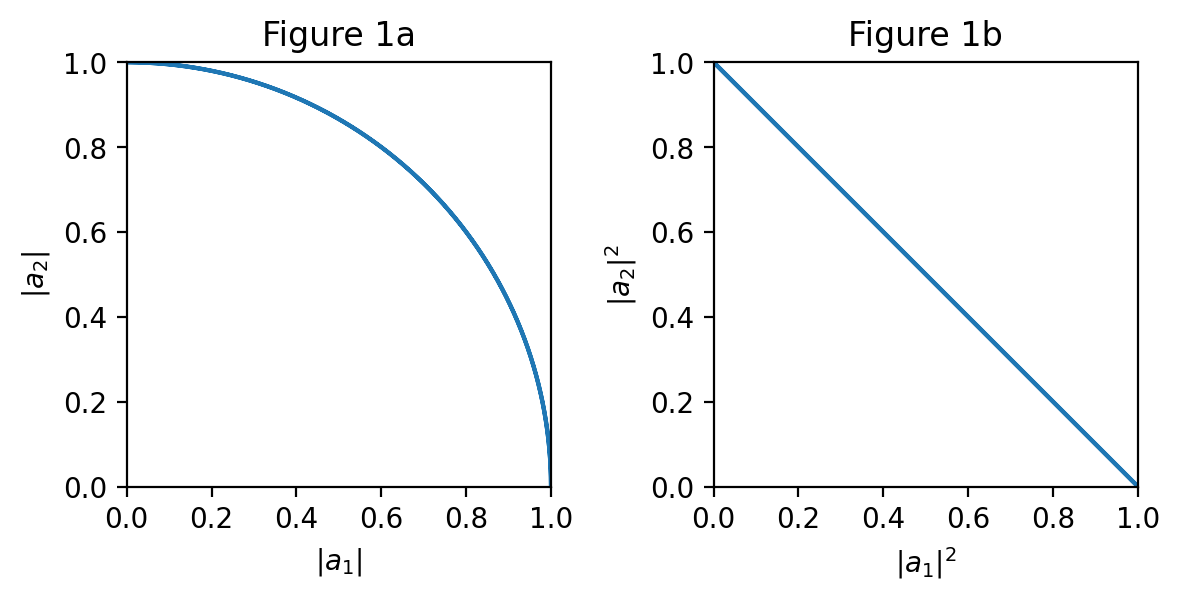

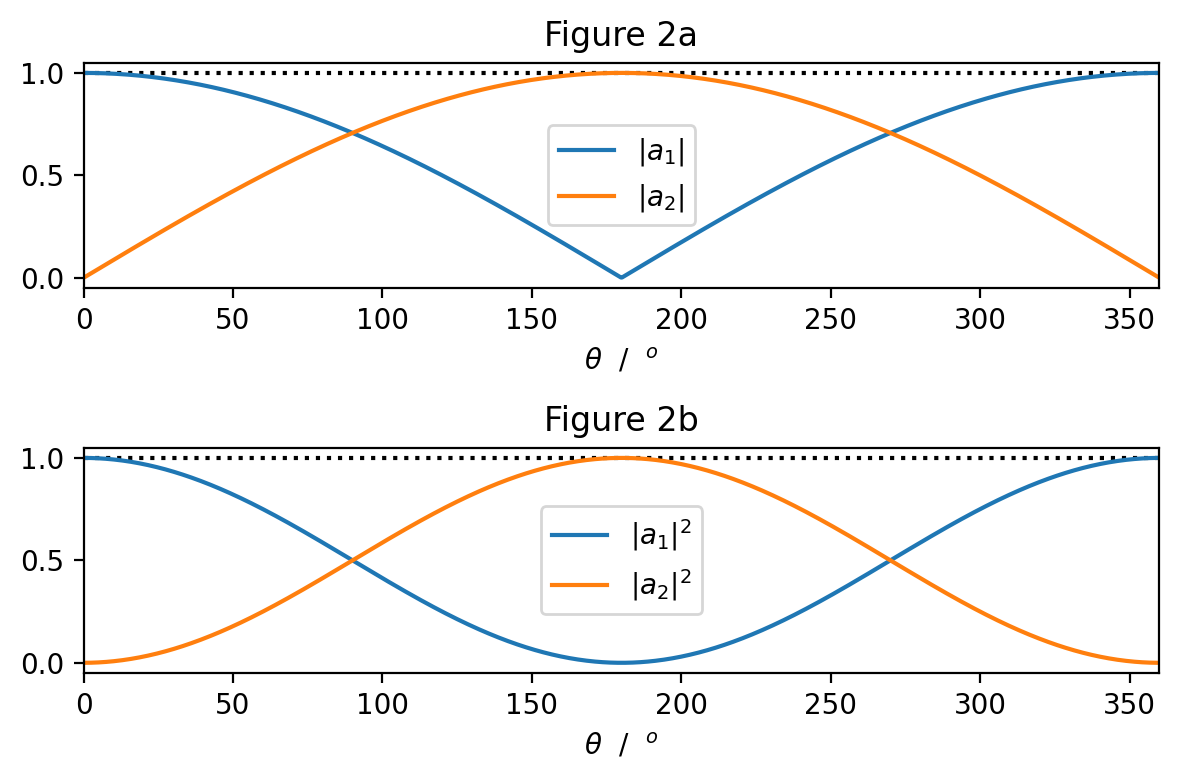

In [4]:
θ = np.linspace(0, 2*np.pi, 1000)
δ = np.pi / 2
χ = [ 
    np.cos(θ/2), 
    np.exp(1j*δ)*np.sin(θ/2)
 ]

a1 = χ[0]
a2 = χ[1]

plot_figs(θ, a1, a2, 1)

### 4..2 Estados mezclados

A diferencia de un estado de espín puro, donde todas las partículas que conforman el haz pueden ser descritas por un mismo vector de estado $|\chi\rangle$, en los estados de espín mezclados no es posible garantizar una misma fase $\delta$ para todas las partículas que constituyen el haz, por lo tanto, la fase $\delta$ no está bien definida en un estado de espín mezclado y, por ello, no es posible expresar el estado de las partículas por un único vector de estado para todo el haz.

Un estado mezclado se puede formar, por ejemplo, a partir de dos estados puros $|\chi_a\rangle = a_1^{(a)} |\frac{1}{2}\rangle + a_2^{(a)} |-\frac{1}{2}\rangle$ y $|\chi_b\rangle = a_1^{(b)} |\frac{1}{2}\rangle + a_2^{(b)} |-\frac{1}{2}\rangle$. Si el haz formado por $N_1$ partículas en el estado $|\chi_a\rangle$ y $N_2$, en $|\chi_b\rangle$ pasan por un filtro de Stern-Gerlach, por estar en un estado de espín mezclado, es imposible encontrar un ángulo para el cual la intensidad de la entrada sea igual al de la salida. La descripción del estado del haz se puede realizar en términos del operador densidad $\hat{\rho}$, el cual está definido en términos de los estados $|\chi_a\rangle$ y $|\chi_b\rangle$ así:

$$\hat{\rho} = \frac{N_1}{N_1 + N_2} |\chi_a\rangle \langle\chi_a| + \frac{N_2}{N_1 + N_2} |\chi_b\rangle \langle\chi_b|$$

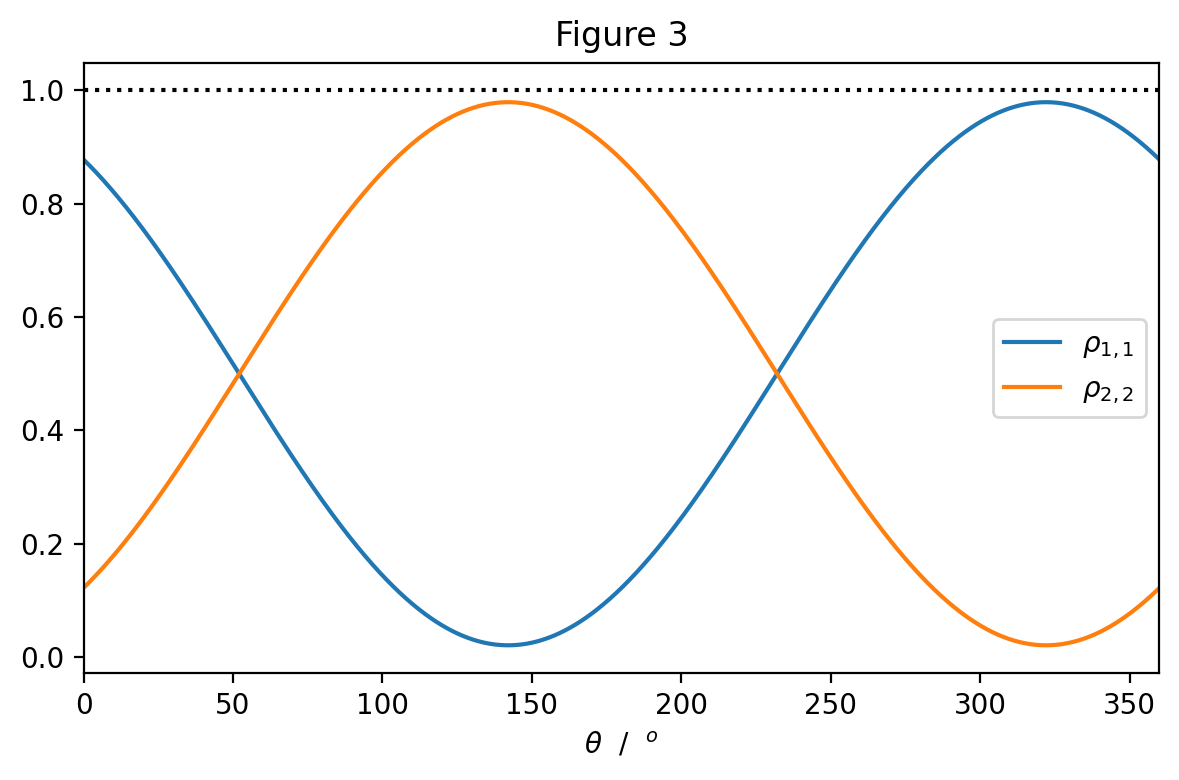

In [5]:
θ1 = np.linspace(0, 2*np.pi, 1000)
δ1 = np.pi / 2
χ1 = [ 
    np.cos(θ1/2),  # Componente del estado | 1/2 >
    np.exp(1j*δ1)*np.sin(θ1/2)
 ]

θ2 = θ1 + np.pi/4
δ2 = np.pi / 3
χ2 = [ 
    np.cos(θ2/2), 
    np.exp(1j*δ2)*np.sin(θ2/2)  # Componente del estado | -1/2 > 
 ]

N1 = 1e6
N2 = 5e6

W1 = N1 / (N1 + N2)
W2 = N2 / (N1 + N2)

ρ_11 = W1 * np.abs(χ1[0])**2 + W2 * np.abs(χ2[0])**2
ρ_22 = W1 * np.abs(χ1[1])**2 + W2 * np.abs(χ2[1])**2

plot_rho(θ1, ρ_11, ρ_22, 3)

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. Con sus propias palabras, plantee el problema resuelto en este *Worked Example*.

5.1.2. Realice un dibujo ilustrativo de la configuración Stern-Gerlach. Explique cada parte de su dibujo.

5.1.3. Realice un dibujo donde ilustre el uso de la configuración Stern-Gerlach como filtro de haz (cuando se bloquea una de las dos componentes, para espín 1/2). Explique cada parte de su dibujo.

5.1.4. Realice un dibujo donde explique en qué consiste rotar el imán de tal manera que el gradiente del campo magnético cambie del eje $z$ a otro eje $z'$. Explique cada parte de su dibujo.

5.1.5. ¿Cuál es el significado físico de las matrices de Pauli, sus autovectores y sus valores esperados?

### 5.2. Segundo bloque de preguntas

Para los estados de espín puro:

5.2.1. Interprete las figuras 1a y 2a en términos del vector de estado $|\chi, \theta\rangle$.

5.2.2. Interprete las figuras 1b y 2b en términos del vector porlarización $\vec{P}$.

5.2.3. Deduzca la expresión para $|\chi\rangle$ expresada en términos de $\theta$ y $\delta$.

5.2.4. Deduzca las expresiones para las componentes del vector de polarización $\vec{P}$ e interprete cada uno de los términos que la componen.

5.2.5. ¿Cuál es el sentido físico, si lo tienen, de $\theta$ y $\delta$?

### 5.3. Tercer bloque de preguntas

Para los estados de espín mezclados:

5.3.1. Explique por qué los coeficientes $W_1$ y $W_2$ suman uno, mientras que las componentes de los vectores de estados puros $|\chi_a\rangle$ y $|\chi_b\rangle$ son sus cuadrados los que suman uno.

5.3.2. Grafique la magnitud del vector de polarización $\vec{P}$ en función del ángulo $\theta$ y muestre que para el caso de estados mezclados siempre es menor que uno.

5.3.3. Obtenga todos los términos de la matriz densidad $\hat{\rho}$ en la base $|\frac{1}{2}\rangle$, $|-\frac{1}{2}\rangle$.

5.3.4. ¿Cuál es el sentido físico, si lo tiene, de cada uno de los términos de la matriz densidad calculada?

5.3.5. ¿Por qué al analizar la figura 3 se puede concluir que al pasar el haz con estados mezclados por un filtro Stern-Gerlach, a ningún ángulo se observará la misma intensidad de la entrada, lo cual se espera para estados de espín mezclados?

End!